<a href="https://colab.research.google.com/github/Cristiand056/TelecomX_parte2_Latam/blob/main/TelecomX_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocesamiento de los datos

In [163]:
import pandas as pd

In [164]:
datos = pd.read_csv('/content/data.csv')
datos.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6401,8785-CJSHH,No,Female,0,Yes,No,60,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,5985.75
3745,5150-LJNSR,No,Male,0,Yes,Yes,31,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,No,One year,No,Bank transfer (automatic),98.05,3082.1
3539,4879-GZLFH,No,Female,0,Yes,Yes,42,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.15,3875.4
5024,6870-ECSHE,No,Female,0,No,No,2,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.45,34.8
1130,1597-FZREH,Yes,Female,0,No,No,2,Yes,No,DSL,...,No,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,76.40,160.8


In [165]:
datos = datos.drop(columns=['customerID'], axis=1)

In [166]:
datos.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5991,No,Female,0,No,No,53,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,No,Electronic check,90.80,4921.2
427,Yes,Male,1,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,25.05,25.05
4842,No,Female,0,Yes,No,12,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,51.25,612.1
3455,Yes,Male,0,Yes,No,59,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),99.50,5961.1
5289,No,Female,0,No,No,14,Yes,No,DSL,No,No,No,Yes,No,Yes,One year,No,Credit card (automatic),59.10,772.85


In [167]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


<b> Al notar datos faltantes en la variable de respuesta se eliminar estas filas ya que de dar un valor podria influir en el los futuros modelos

In [168]:
datos = datos.replace(' ', float('nan'))

In [169]:
datos = datos.dropna()

In [170]:
X = datos.drop(columns=['Churn'], axis=1)
y = datos['Churn']

In [171]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [172]:
y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


##Encoding

###Variables explicativas

In [173]:
variables_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies', 'Contract',	'PaperlessBilling',	'PaymentMethod']

In [174]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [175]:
columnas = X.columns

In [176]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                   variables_categoricas),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [177]:
X = one_hot.fit_transform(X)

In [178]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_Male', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_Yes', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Ye

In [179]:
X

array([[0.0, 1.0, 1.0, ..., 9, 65.6, '593.3'],
       [1.0, 0.0, 0.0, ..., 9, 59.9, '542.4'],
       [1.0, 0.0, 0.0, ..., 4, 73.9, '280.85'],
       ...,
       [1.0, 0.0, 0.0, ..., 2, 50.3, '92.75'],
       [1.0, 1.0, 1.0, ..., 67, 67.85, '4627.65'],
       [1.0, 1.0, 1.0, ..., 63, 59.0, '3707.6']], dtype=object)

In [180]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,9,65.6,593.3
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,9,59.9,542.4
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,4,73.9,280.85
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,13,98.0,1237.85
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,3,83.9,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,13,55.15,742.9
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,22,85.1,1873.7
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,2,50.3,92.75
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,67,67.85,4627.65


###Transformación variable respuesta

In [181]:
from sklearn.preprocessing import LabelEncoder

In [182]:
label_encoder = LabelEncoder()

In [183]:
y = label_encoder.fit_transform(y)

In [184]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Verificación de la Proporción de Cancelación (Churn)

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

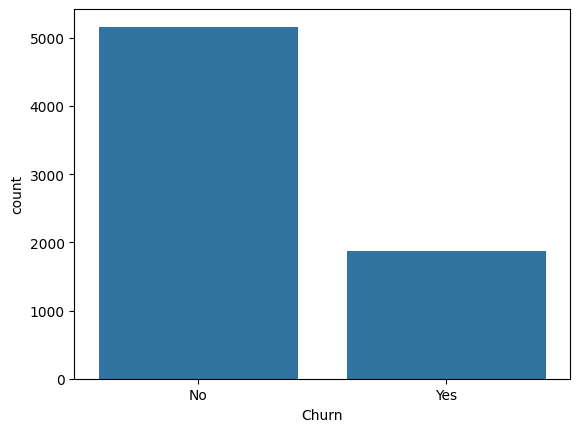

In [186]:
sns.barplot(x=datos['Churn'].value_counts().index, y=datos['Churn'].value_counts())
plt.show()

In [187]:
porcentaje_cancelacion = datos['Churn'].value_counts(normalize=True)
print(f'{round(porcentaje_cancelacion,3)*100}')

Churn
No     73.4
Yes    26.6
Name: proportion, dtype: float64


<b> Se onserva un desvalace entre la clase Churn, por lo tanto los modelos posteriores seran analisados para elegir una posible solucion ya sea oversmapling o undersampling

#Modelado preliminar

##Segmentación de las variables explicativas

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###Modelo de referencia - baseline

In [190]:
from sklearn.dummy import DummyClassifier

In [191]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7341862117981521

###Modelo de prueba arbol de decisión

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

modelo_arbol.score(X_test, y_test)

0.7157071783937455